In [2]:
import torch
import pickle
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
from torchvision import transforms
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import datasets
import plots

In [5]:
data = datasets.get_dataset('mnist')

==> Preparing data MNIST


In [4]:
model_4_expert = torch.load('/Users/galblecher/Desktop/Thesis_out/mnist_naive/mnist_4_expert/model.pkl', map_location=torch.device('cpu'))

In [6]:
dominant_dict = plots.experts_areas(model_4_expert, data['test_loader'])

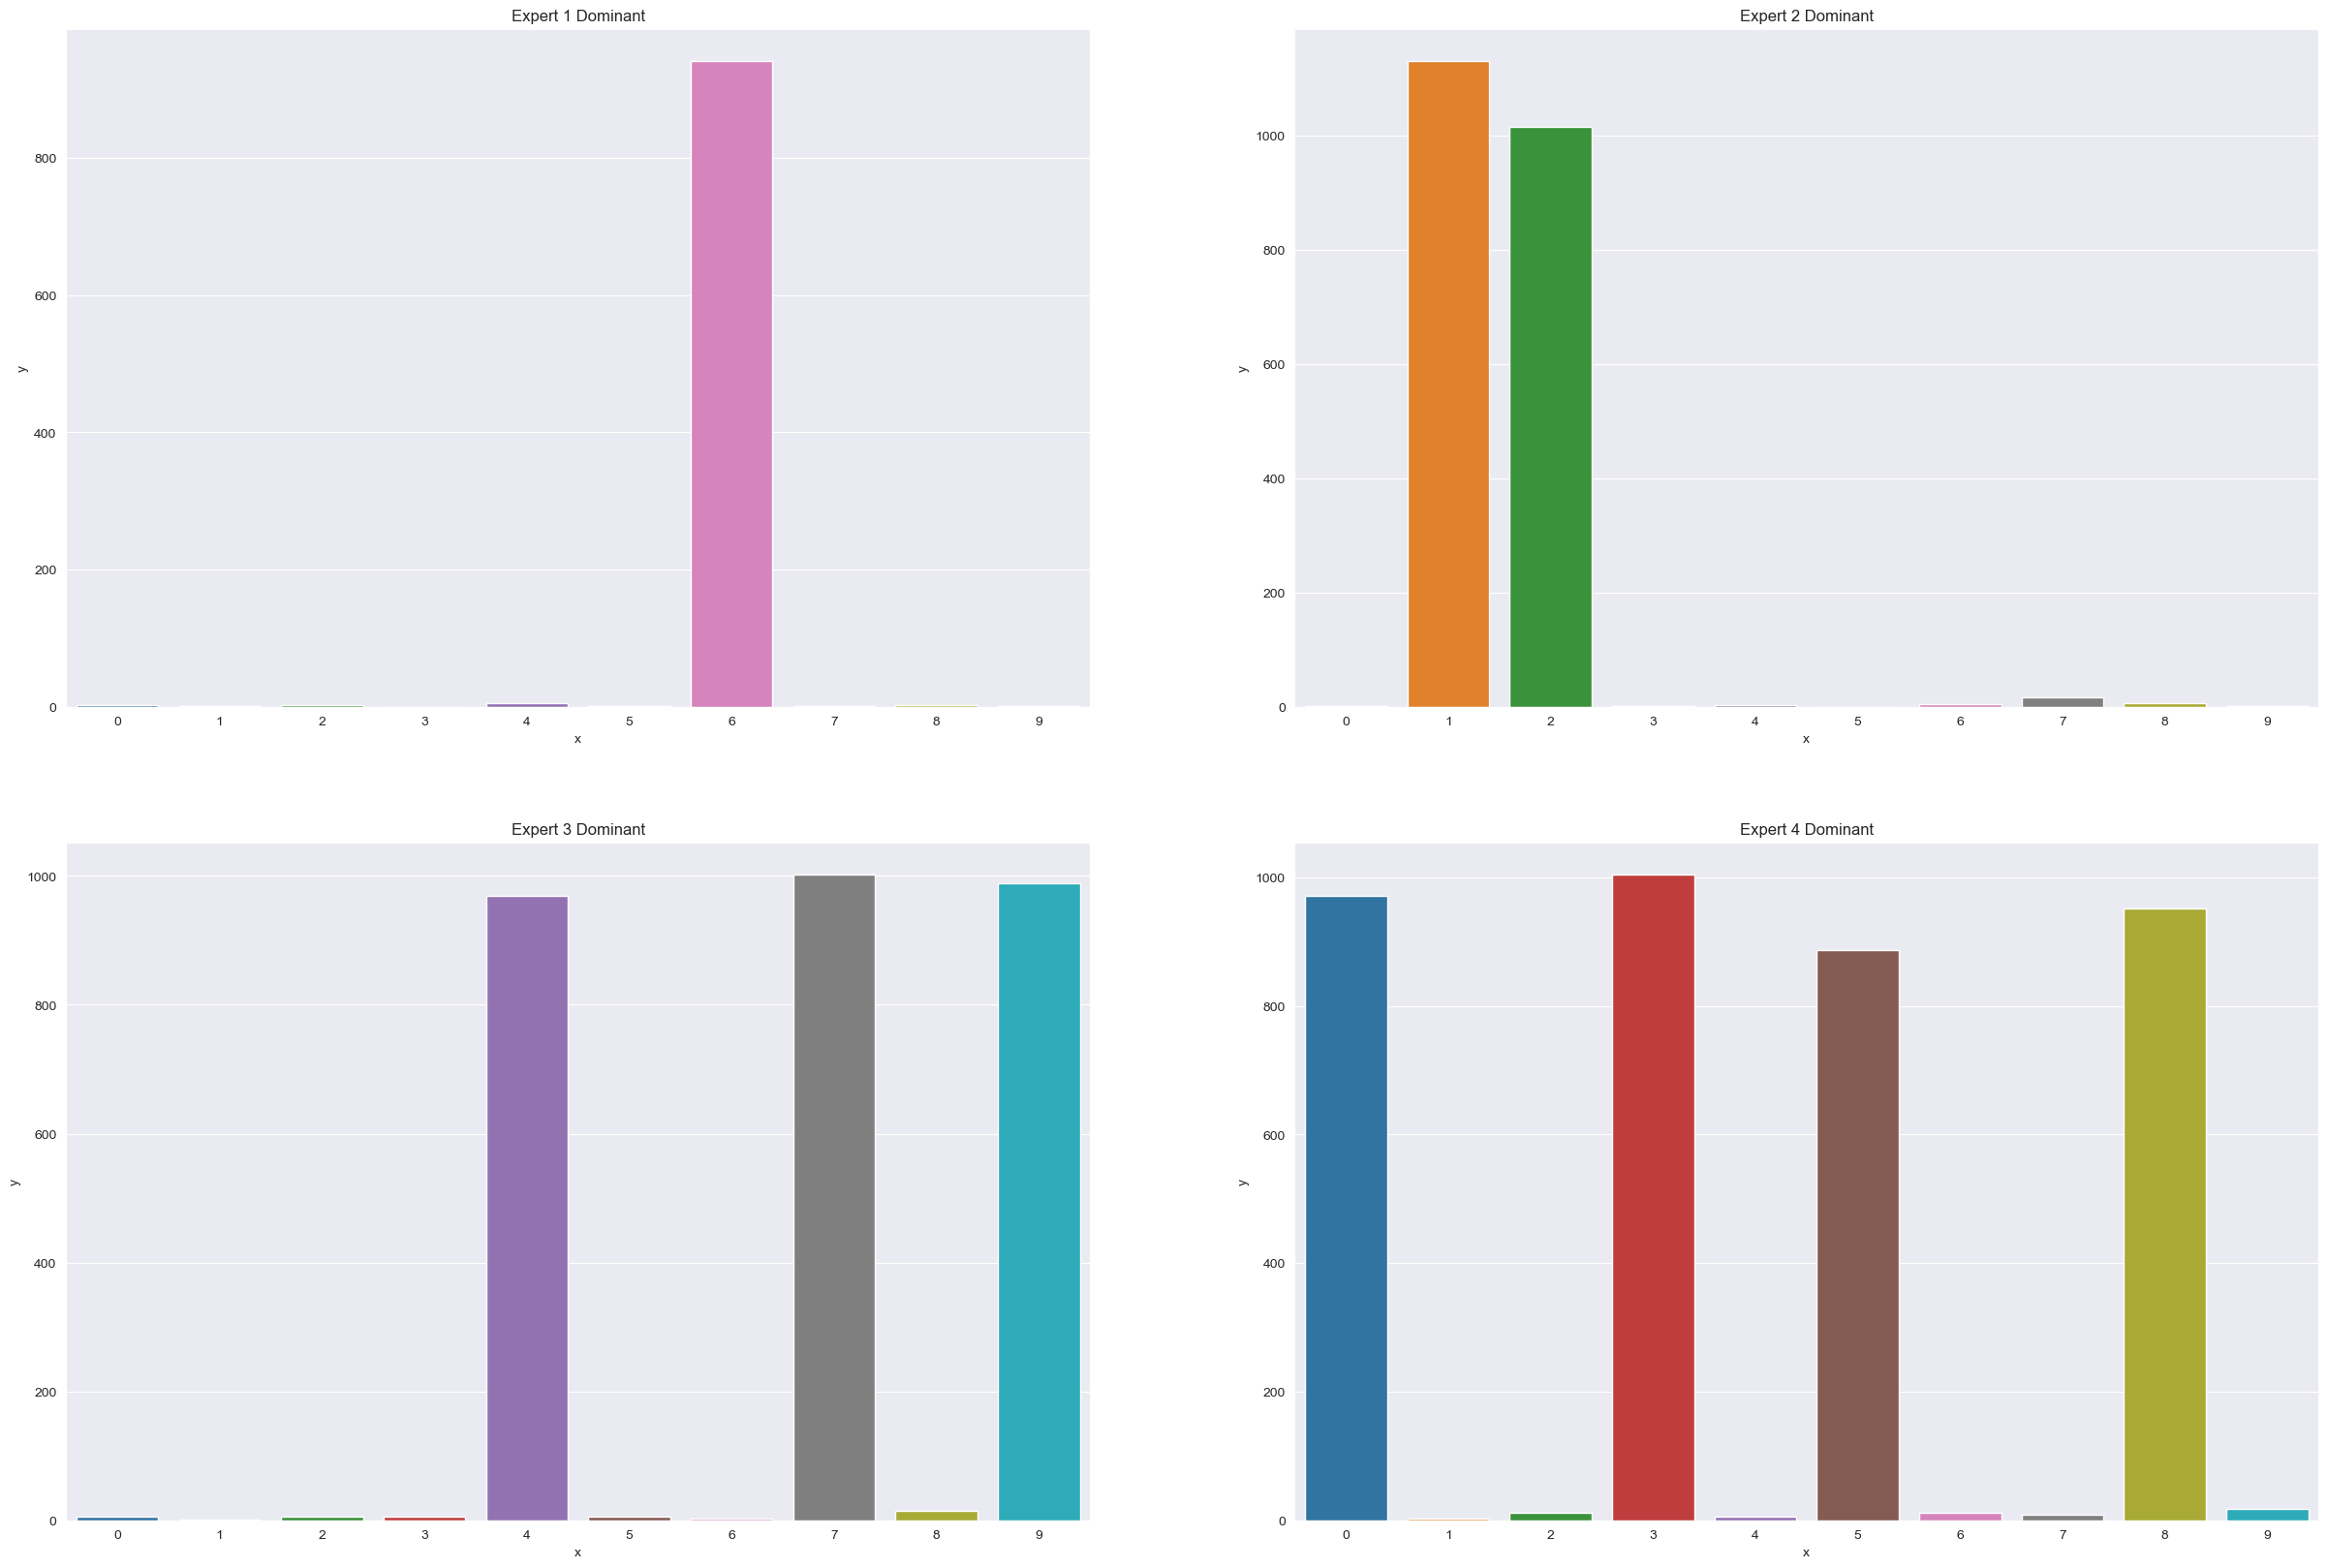

In [7]:
dominant_df_expert_1 = pd.DataFrame({'x': np.arange(10), 'y': dominant_dict['0']})
dominant_df_expert_2 = pd.DataFrame({'x': np.arange(10), 'y': dominant_dict['1']})
dominant_df_expert_3 = pd.DataFrame({'x': np.arange(10), 'y': dominant_dict['2']})
dominant_df_expert_4 = pd.DataFrame({'x': np.arange(10), 'y': dominant_dict['3']})

fig, ax = plt.subplots(2, 2, figsize=(30,20))

sns.barplot(ax=ax[0,0], x='x', y='y', data=dominant_df_expert_1).set(title='Expert 1 Dominant')
sns.barplot(ax=ax[0,1], x='x', y='y', data=dominant_df_expert_2).set(title='Expert 2 Dominant')
sns.barplot(ax=ax[1,0], x='x', y='y', data=dominant_df_expert_3).set(title='Expert 3 Dominant')
sns.barplot(ax=ax[1,1], x='x', y='y', data=dominant_df_expert_4).set(title='Expert 4 Dominant');

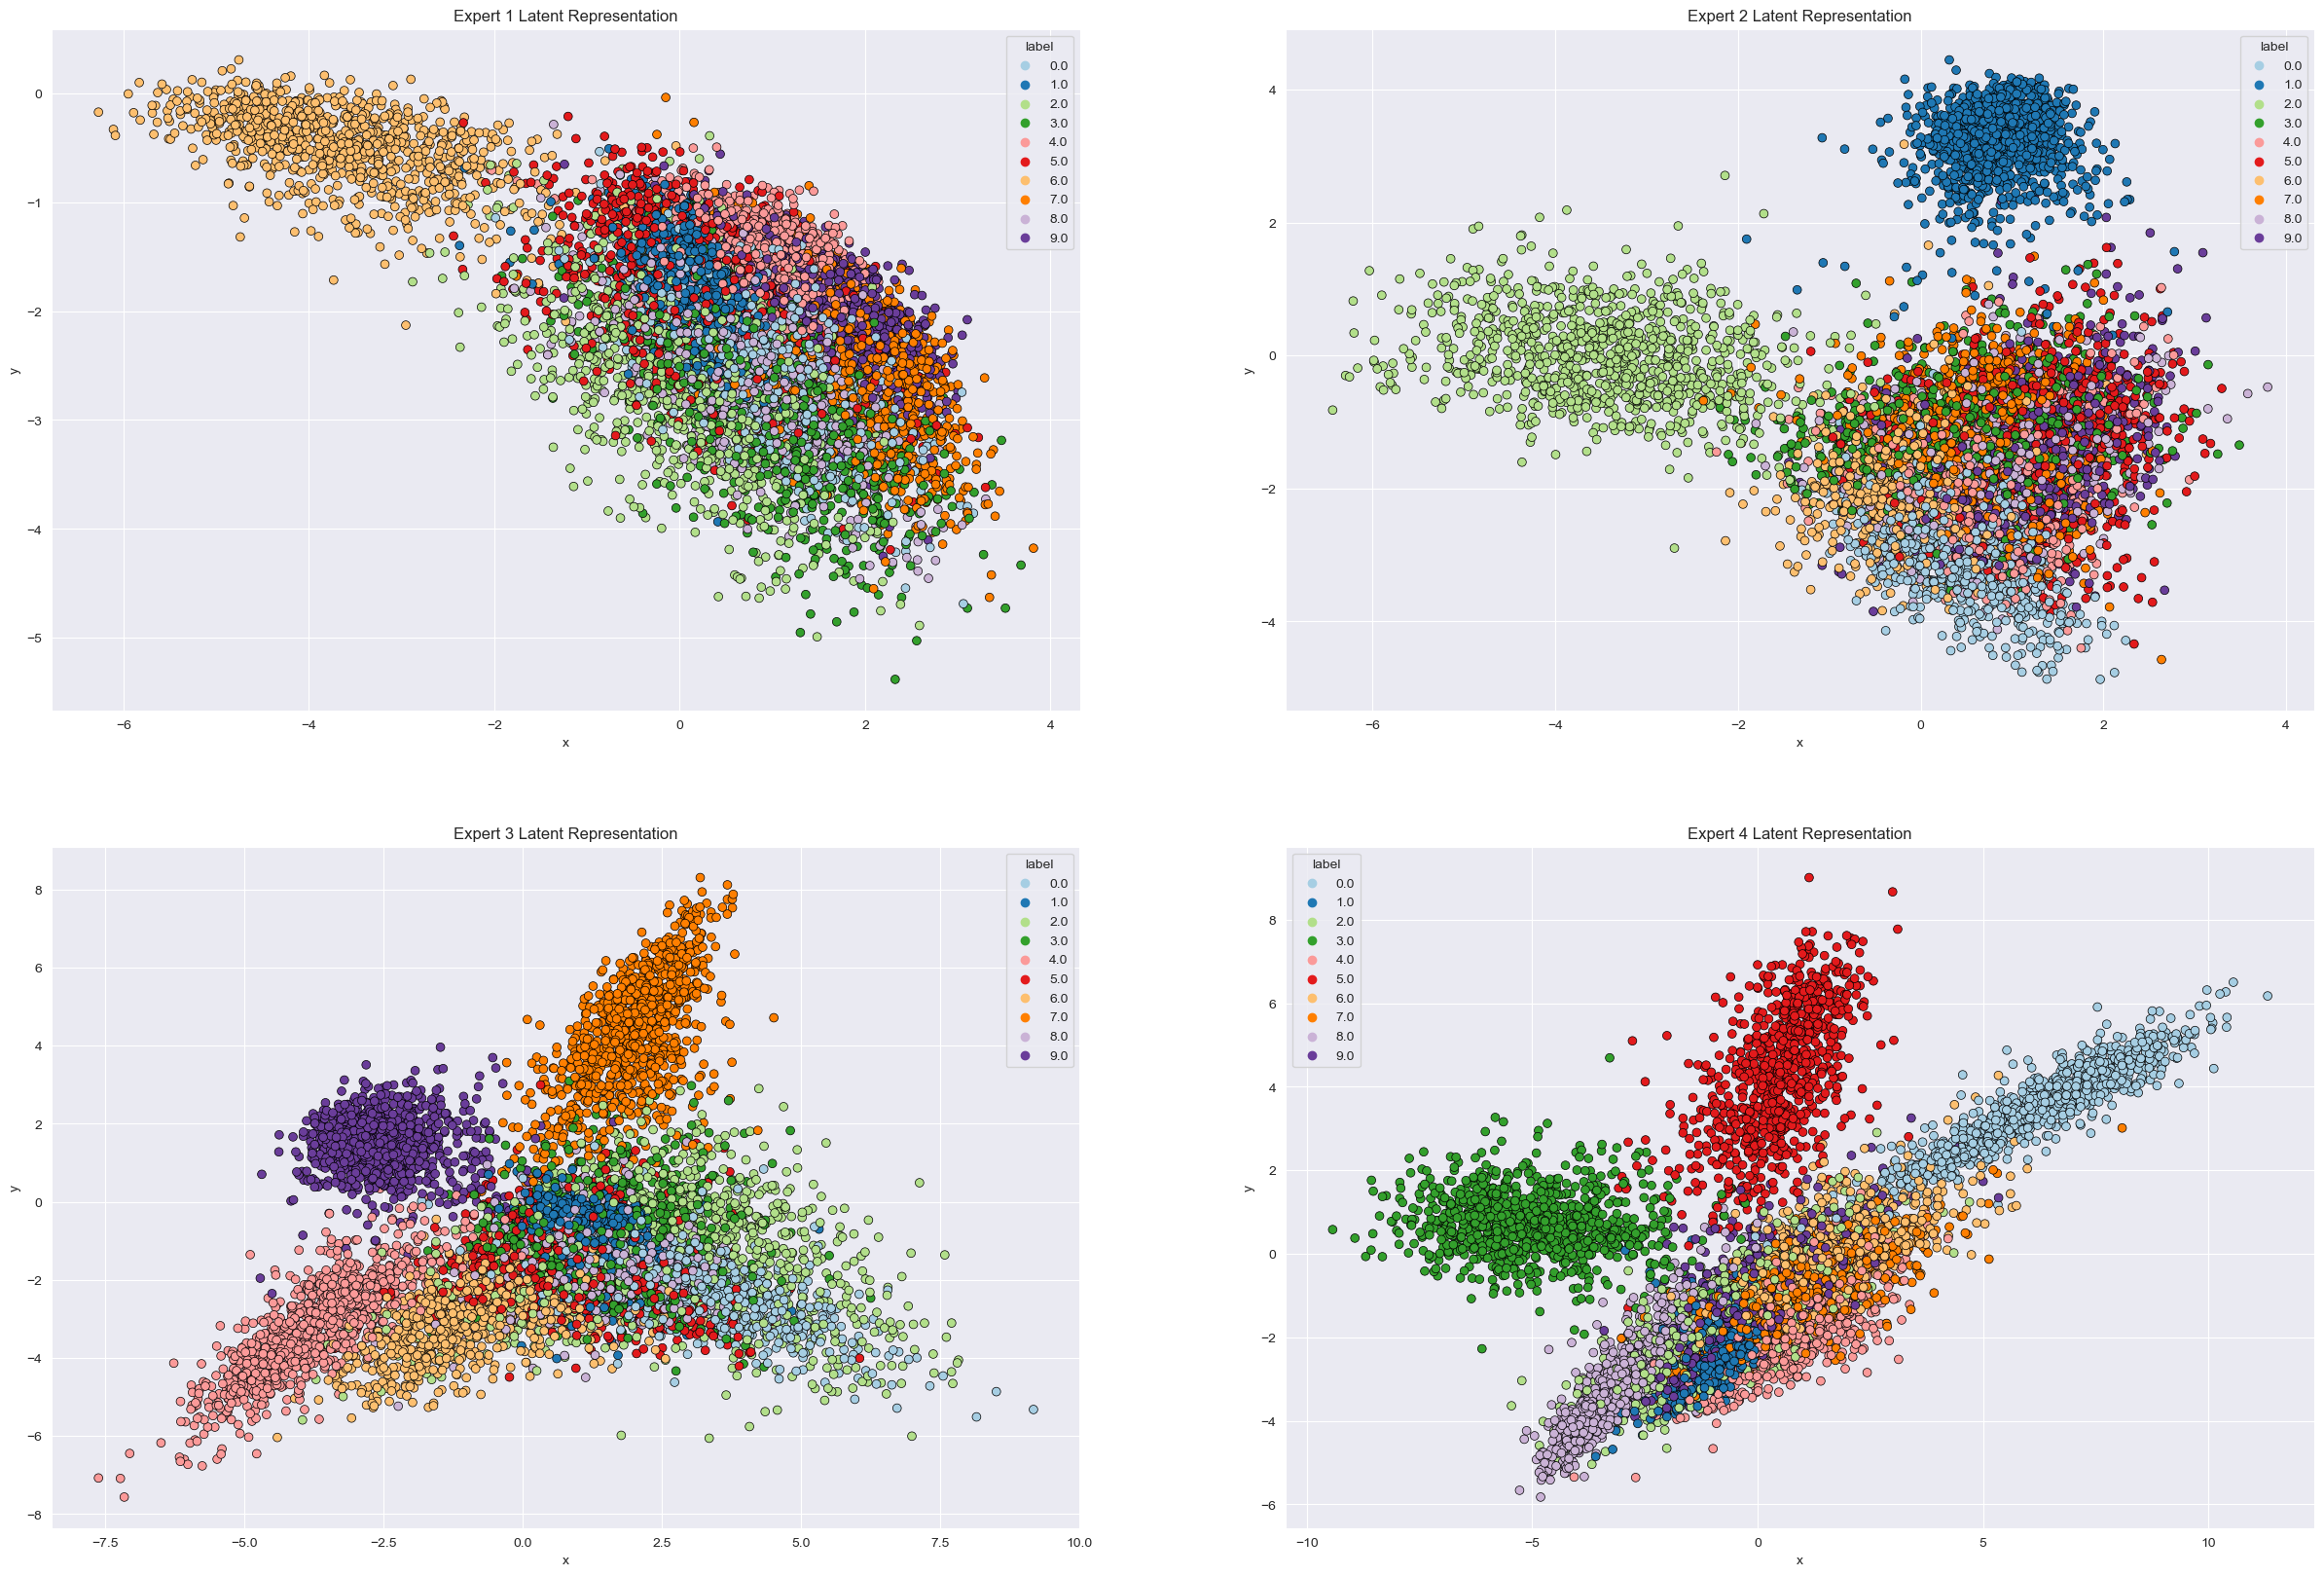

In [8]:
points_df_expert1 = plots.plot_data_latent(model_4_expert.expert1, data['test_loader'], plot_boundary=None, show=False)
points_df_expert2 = plots.plot_data_latent(model_4_expert.expert2, data['test_loader'], plot_boundary=None, show=False)
points_df_expert3 = plots.plot_data_latent(model_4_expert.expert3, data['test_loader'], plot_boundary=None, show=False)
points_df_expert4 = plots.plot_data_latent(model_4_expert.expert4, data['test_loader'], plot_boundary=None, show=False)

fig, ax = plt.subplots(2, 2, figsize=(30,20))

sns.scatterplot(ax=ax[0,0], data=points_df_expert1, x='x', y='y', hue='label', palette='Paired', edgecolor="black",
                s=40, legend='full').set(title='Expert 1 Latent Representation')
sns.scatterplot(ax=ax[0,1], data=points_df_expert2, x='x', y='y', hue='label', palette='Paired', edgecolor="black",
                s=40, legend='full').set(title='Expert 2 Latent Representation')
sns.scatterplot(ax=ax[1,0], data=points_df_expert3, x='x', y='y', hue='label', palette='Paired', edgecolor="black",
                s=40, legend='full').set(title='Expert 3 Latent Representation')
sns.scatterplot(ax=ax[1,1], data=points_df_expert4, x='x', y='y', hue='label', palette='Paired', edgecolor="black",
                s=40, legend='full').set(title='Expert 4 Latent Representation');

In [5]:
model_4_expert = torch.load('/Users/galblecher/Desktop/Thesis_out/rotate_cifar/rotate_resner18_4_experts1677796643/model.pkl', map_location=torch.device('cpu'))

In [ ]:
points_df_expert1 = plots.plot_data_latent(model_4_expert.expert1, data['test_loader'], plot_boundary=None, show=False)
points_df_expert2 = plots.plot_data_latent(model_4_expert.expert2, data['test_loader'], plot_boundary=None, show=False)
points_df_expert3 = plots.plot_data_latent(model_4_expert.expert3, data['test_loader'], plot_boundary=None, show=False)
points_df_expert4 = plots.plot_data_latent(model_4_expert.expert4, data['test_loader'], plot_boundary=None, show=False)

fig, ax = plt.subplots(2, 2, figsize=(30,20))

sns.scatterplot(ax=ax[0,0], data=points_df_expert1, x='x', y='y', hue='label', palette='Paired', edgecolor="black",
                s=40, legend='full').set(title='Expert 1 Latent Representation')
sns.scatterplot(ax=ax[0,1], data=points_df_expert2, x='x', y='y', hue='label', palette='Paired', edgecolor="black",
                s=40, legend='full').set(title='Expert 2 Latent Representation')
sns.scatterplot(ax=ax[1,0], data=points_df_expert3, x='x', y='y', hue='label', palette='Paired', edgecolor="black",
                s=40, legend='full').set(title='Expert 3 Latent Representation')
sns.scatterplot(ax=ax[1,1], data=points_df_expert4, x='x', y='y', hue='label', palette='Paired', edgecolor="black",
                s=40, legend='full').set(title='Expert 4 Latent Representation');

In [8]:
data['test_loader']

In [3]:
batch = next(iter(data['test_loader']))

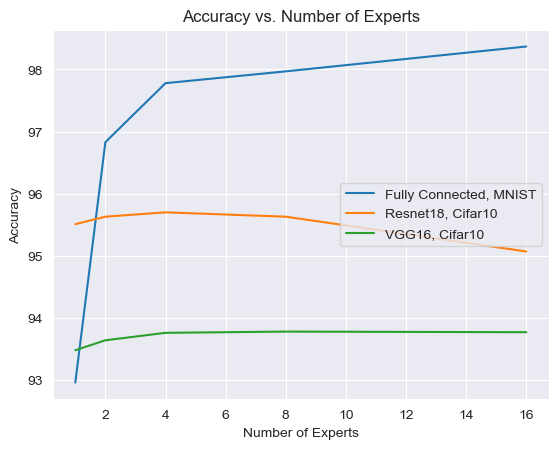

In [7]:
mnist_acc = [92.96, 96.83, 97.78, 97.97, 98.37]
cifar10_resnet_acc = [95.51, 95.63, 95.70, 95.63, 95.07]
cifar10_vgg_acc = [93.48, 93.64, 93.76, 93.78, 93.77]
n_experts = [1, 2, 4, 8, 16]

plt.plot(n_experts, mnist_acc, label='Fully Connected, MNIST')
plt.plot(n_experts, cifar10_resnet_acc, label='Resnet18, Cifar10')
plt.plot(n_experts, cifar10_vgg_acc, label='VGG16, Cifar10')

plt.xlabel('Number of Experts')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Experts')
plt.legend()
plt.show()